In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# interactive in notebook
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
import pylab

### other module
from util_tsne import *

Automatically created module for IPython interactive environment


### training kernels

In [2]:
training_kernels = [[0.523255814,0.898519,1.273404,0.3188,0.3990453679,0.3990453679,0,0.6156719307,1,2.158354],
[0.5882352941,0.897425,1.434779,0.3589,0.3983864151,0.3983864151,0.6146552798,0.6146552798,2,2.505722],
[0.5462184873,0.891426,1.329263,0.3227,0.389767283,0.389767283,2.40545012,0.3006719453,4,1.8795],
[0.4621848739,0.899354,1.155747,0.2893,0.3871490377,0.3871490377,0.5973111637,0.5973111637,2,1.809195],
[0.4035874439,0.848605,0.338919,0.0847,0.1366144811,1.092986113,0,0,0,0.387801]]

training_kernels = np.array(training_kernels)

print training_kernels.shape

(5, 10)


### best block size for trainig kernels

In [3]:
# training kernel: best block size 
y = [512, 
     512,
     64,
     128,
     64]

# y = np.array(y)
# print y.shape

### test 3d on kernel data

In [4]:
em_gammaobs = [[0.4484304933,0.294736,0.41878,0.1103,0.1435730377,0.06827649057,0,0,0,0.603971]]

em_gammaobs = np.array(em_gammaobs)
#print em_gammaobs.shape

X = training_kernels
X = np.append(X, em_gammaobs, axis=0)

print X.shape

(6, 10)


In [5]:
#X

### tsne-3d

In [6]:
tsne3d = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne3d.fit_transform(X)

In [7]:
X_tsne

array([[ -4.39334533e+02,   1.21341332e+02,  -1.54053265e-01],
       [  5.97127130e+02,   7.23114956e+02,   1.20013685e+01],
       [ -1.35356008e+02,   6.36721851e+01,  -1.89198570e+00],
       [ -2.62446434e+02,  -1.01566997e+03,  -2.80601801e+00],
       [  9.87551584e+01,   9.53984959e+00,  -2.20976575e+02],
       [  1.41277767e+02,   9.79193104e+01,   2.13883998e+02]])

In [8]:
print tsne3d.kl_divergence_
#tsne.get_params

-4.38958406448


In [9]:
top3rows, top3bs = predit_bs_tsne(X_tsne, y)

input X dims : 6 x 3
row 0 : dist=619.250774081
row 1 : dist=799.640440217
row 2 : dist=352.503029368
row 3 : dist=1204.17144564
row 4 : dist=445.783376486
Top 3 distance : 352.503029368 , 445.783376486 ,619.250774081
Top 3 rows : 2 , 4 ,0
Top 3 ranking : 64 , 64 ,512


### visualize data

<IPython.core.display.Javascript object>


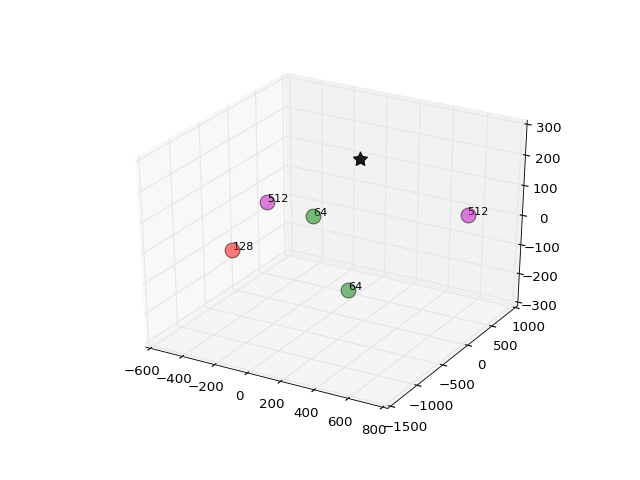

In [10]:
plot_tsne_3d(X_tsne, y)


### tsne-2d

In [11]:
tsne2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne_2d = tsne2d.fit_transform(X)

print X_tsne_2d
print X_tsne_2d.shape

[[-156.19686716  -72.21257696]
 [  54.87036359   93.92175246]
 [-193.89746693  169.67548663]
 [ -74.08374123 -304.97053525]
 [ 129.65194614 -135.50862367]
 [ 234.70001357  241.7045645 ]]
(6, 2)


In [12]:
top3rows, top3bs = predit_bs_tsne(X_tsne_2d, y)

input X dims : 6 x 2
row 0 : dist=501.342540653
row 1 : dist=232.762674308
row 2 : dist=434.607855833
row 3 : dist=627.854339733
row 4 : dist=391.56721748
Top 3 distance : 232.762674308 , 391.56721748 ,434.607855833
Top 3 rows : 1 , 4 ,2
Top 3 ranking : 512 , 64 ,64


<IPython.core.display.Javascript object>


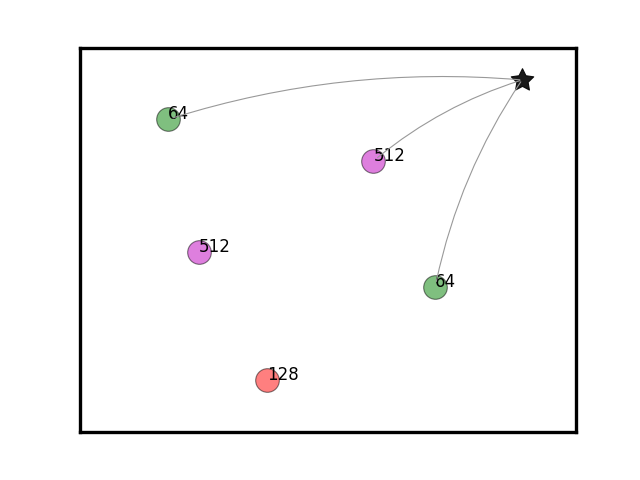

In [13]:
plot_tsne_2d(X_tsne_2d, y, top3rows)